In [1]:
class Node():
    def __init__(self, entry):
        # EOS account name.
        self.identity = entry['identity']
        # Network Stake.
        self.stake = entry['stake']
        # Last emit.
        self.last_emit = entry['last_emit']
        # IP address.
        self.address = entry['address']
        # Port number.
        self.port = entry['port']
        # List of tuples (edge name, edge weight)
        self.edges = entry['edges']
        
    def __repr__(self):
        return self.__str__()

    def __str__(self):
        edge_str = []
        for el in self.edges :
            edge_str.append((el[0], el[1]))
        edge_str = str(edge_str)
        return  "( " + str(self.identity) + " | " + str(self.stake) + " | " + str(self.last_emit)  + ' | ' + edge_str + " )"


In [14]:

import random, string

def random_metagraph(size):

    ids = [''.join(random.choice(string.ascii_lowercase) for x in range(5)) for _ in range(size)]
    edges = []

    for id_i in ids:
        edges_i = []
        weight_sum = random.randint(1, 100)
        edges_i.append((id_i, weight_sum))
        for _ in range(random.randint(0, 5)):
            other_id = random.choice(ids)
            if other_id != id_i:
                weight = random.randint(1, 100)
                weight_sum += weight
                edges_i.append( (other_id, weight) )


            edges_normalized = []
            for edge_tuple in edges_i:
                edges_normalized.append( (edge_tuple[0], edge_tuple[1]/weight_sum) )
            edges.append(edges_normalized)


    b_nodes = []
    for i in range(len(ids)):    

        port = random.randint(0, 10000) + 5000
        n = Node( {'identity': ids[i], 
                   'stake': random.randint(0, 100), 
                   'last_emit': random.randint(0, 100),
                   'address': 'localhost:' + str(port),
                   'port': port,
                   'edges': edges[i]
                  })
        b_nodes.append(n)
    return b_nodes
    


<Figure size 432x288 with 0 Axes>

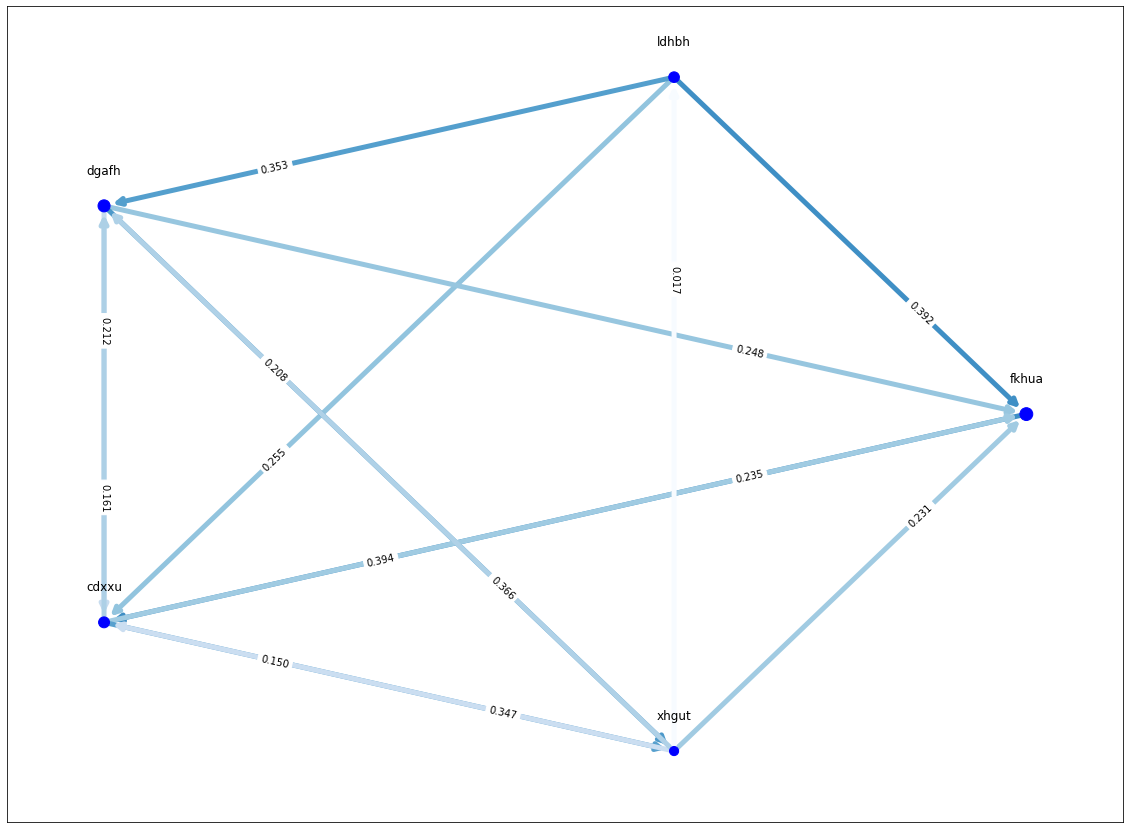

In [15]:
def plot(nodes):
    G = nx.DiGraph()

    total_stake = sum([node.stake for node in nodes])

    # Build node sizes in proportion to stake held within the graph.
    node_sizes = []
    node_labels = {}
    for node in nodes:
        G.add_node(node.identity)
        node_sizes.append(25 + 500*(node.stake/total_stake))
        node_labels[node.identity] = str(node.identity)

    # Edge colors (alphas and weight) reflect attribution wieghts of each
    # connection.
    edge_colors = {}
    edge_labels = {}
    for node in nodes:
        for edge in node.edges:
            if (node.identity, edge[0]) not in edge_labels:
                G.add_edge(node.identity, edge[0])
                edge_colors[(node.identity, edge[0])] = float(edge[1])
                if node.identity != edge[0]:
                    edge_labels[(node.identity, edge[0])] = "%.3f" % float(edge[1])
                else:
                    edge_labels[(node.identity, edge[0])] = ""

    # Set edge weights.
    for u,v,d in G.edges(data=True):
        d['weight'] = edge_colors[(u,v)]
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    # Clear Matplot lib buffer and create new figure.
    plt.cla()
    plt.clf()
    figure = plt.figure(figsize=(20,15))

    pos = nx.layout.circular_layout(G)
    nxnodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
    edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color=weights, edge_cmap=plt.cm.Blues, width=5)

    edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, with_labels = True, label_pos=0.3)

    for node in nodes:
        pos[node.identity] = pos[node.identity] + numpy.array([0, 0.1])
    labels = nx.draw_networkx_labels(G, pos, node_labels)

    plt.show(figure)


plot (random_metagraph(5))